# Investigating environmental characteristics of US cities using publicly available ASDI datasets

#### **March 2020 - COVID-19 pandemic and "Work From Home".**
The [coronavirus disease (COVID-19) pandemic](https://www.who.int/emergencies/diseases/novel-coronavirus-2019 "World Health Organisation (WHO) - Coronavirus disease (COVID-19) pandemic") has led to so much change. 

Working remotely during the pandemic changed the conversation around work-life balance. Employees saw first-hand how job roles successfully adapted away from the physical office.

The "Work From Home" trend has forever changed how employees view their careers and their work environment. 
<br>
<br>

#### **2021 - Reopening to The Great Resignation.**
As countries reopened and COVID-19 restrictions were relaxed, [The Great Resignation](https://www.weforum.org/agenda/2021/11/what-is-the-great-resignation-and-what-can-we-learn-from-it/ "WeForum - What is 'The Great Resignation'? An expert explains") started. 

Interest in remote work and flexible-hours roles skyrocketed.

By working in a location-agnostic job role, employees could now earn a higher salary in a low cost of living area, travel whilst working, live closer to friends and family and save time and money from the daily office commute.
<br>
<br>

#### **November 2021 - COP26 and the IPCC Report - A Call to Action.**
On 13 November 2021, the 26th UN Climate Change Conference of the Parties (COP26) led to the signing of [The Glasgow Climate Pact](https://ukcop26.org/the-glasgow-climate-pact/ "UK COP26 - The Glasgow Climate Pact"), a collective global agreement to limit the rise in global temperature to 1.5°C. Four key actions were highlighted: Mitigation, Adaptation & Loss and Damage, Finance and Collaboration.

On 4 April 2022, the Intergovernmental Panel on Climate Change (IPCC) published the third part (WG III) of the Sixth Assessment Report (AR6), [Climate Change 2022: Mitigation of Climate Change](https://www.ipcc.ch/report/sixth-assessment-report-working-group-3/ "IPCC - Climate Change 2022: Mitigation of Climate Change"). This report outlined that current plans to address climate change are not ambitious enough to limit global warming to 1.5°C. To limit warming to around 1.5°C requires global greenhouse gas emissions to peak before 2025 at the latest, and be reduced by 43% by 2030.

## **The call to action is emphasised as a collective responsibility across governments, institutions, industries, organisations and individuals.** ##
<br>
<br>


![](https://d39w7f4ix9f5s9.cloudfront.net/dims4/default/b0a3a8a/2147483647/strip/true/crop/1000x800+0+0/resize/1240x992!/quality/90/?url=http%3A%2F%2Famazon-blogs-brightspot.s3.amazonaws.com%2F9f%2F55%2F3f1edbba4cfc984b680cedf8de67%2Fasdi.png "ASDI Graphic")

<br>
<br>

#### **Which US city should I live in? How can _sustainability data_ help me make the best choice?**

---
**Note:** The [Amazon Sustainability Data Initiative (ASDI) on AWS](https://registry.opendata.aws/collab/asdi/ "Amazon Sustainability Data Initiative (ASDI)") seeks to accelerate sustainability research and innovation by minimizing the cost and time required to acquire and analyze large sustainability datasets. These datasets are publicly available to anyone. 

---
An environmentally sustainable lifestyle and a "Digital Nomad" career certainly sounds appealing and achievable in theory. 

However, there are many socio-economic and environmental considerations for choosing where to live and work so it is worth doing a lot of research (and crunching the data!) before committing to this life-changing decision.

**In this notebook, I'll gather insights from the following ASDI datasets:**
1. [Air quality data from OpenAQ](#ASDI_dataset_1)
2. [Climate data from NOAA U.S. Climate Normals](#ASDI_dataset_2)
3. [Population data from CIESIN and Meta](#ASDI_dataset_3)
4. [Built environment information from Open City Model](#ASDI_dataset_4)


Since this demo project is presented at the re:MARS 2022 conference, I'll characterise Las Vegas, Nevada from these datasets.

<hr>

### Install Python libraries (Optional)

Creating an environment in SageMaker Studio Lab is easy, just select the `environment.yml` file (by cloning this repository or uploading it directly), right click the YML file and select `Build Conda Environment`. Once the environment is created, you should open this Jupyter notebook with the newly created Python kernel. 

Optionally you can also uncomment the package installation section of the notebook to install these packages manually.


In [1]:
# Use the environment.yml file to install the Python libraries into the SageMaker Studio Lab's conda environment
# %pip install geopandas
# %pip install Shapely

### Import all the Python libraries

In [2]:
from datetime import datetime
import geopandas as gpd
import json
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from shapely.geometry import Point

%matplotlib inline

<hr>

### Visualising the City of Las Vegas, Clark County, Nevada

---
**Note:** 2021 Cartographic Boundary Files (shapefile format) are from the United States Census Bureau, Department of Commerce was accessed on 6 June 2022 from https://www2.census.gov/geo/tiger/GENZ2021/shp/.

Clark County shapefiles were accessed on 6 June 2022 from [Clark County GIS Management Office](https://clarkcountygis-ccgismo.hub.arcgis.com/search?collection=Dataset) and [ArcGIS Hub](https://hub.arcgis.com/search?collection=Dataset).

Mapping of shapefiles coordinates to counties credited to [code example by Damon Cortesi](https://dacort.dev/posts/emr-eks-custom-images-with-openaq/#mapping-coordinates-to-counties).

---

First, let's take the state and county shapefiles and plot the boundaries using GeoPandas.

In [3]:
STATE_FILE = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip'
COUNTY_FILE = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_500k.zip'

# Exclude the "inhabited territories" - https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States
EXCLUDED_STATES = ["AK", "HI", "PR", "GU", "VI", "MP", "AS"]

In [4]:
states_df = gpd.read_file(STATE_FILE).query(f"STUSPS not in {EXCLUDED_STATES}")
counties_df = gpd.read_file(COUNTY_FILE).query(f"STUSPS not in {EXCLUDED_STATES}")
print(counties_df.shape)
print(states_df.shape)

(3108, 13)
(49, 10)


In [5]:
# State of Nevada shapefile
nv_counties_df = counties_df[counties_df['STATE_NAME']=='Nevada']
print(nv_counties_df.shape)

(17, 13)


The State of Nevada is highlighted in blue in the map visualisation below. The county boundaries within Nevada can be seen as well.

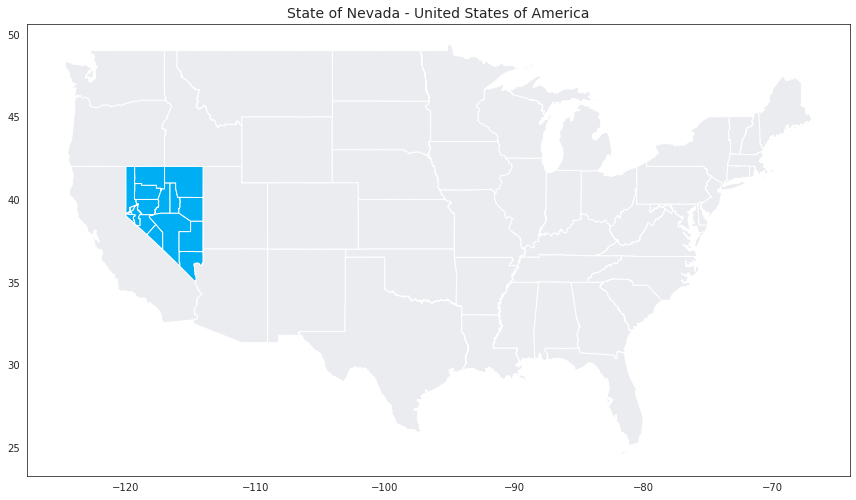

In [6]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(12,12))
    states_df.plot(ax=ax,color='#EBECF0')
    nv_counties_df.plot(ax=ax, color='#00AEF3')
    plt.title("State of Nevada - United States of America", fontsize=14)
    plt.tight_layout()
    plt.show()

In [7]:
# Clark County, Nevada shapefile
clark_county_df = counties_df[(counties_df['NAMELSAD'] == 'Clark County') & (counties_df['STATE_NAME']=='Nevada')]

**Note:** Download the Shapefile in ZIP format (170 records, ~405KB) from the [Place dataset](https://clarkcountygis-ccgismo.hub.arcgis.com/datasets/ccgismo::place/explore?location=35.922613%2C-114.964700%2C9.85) from the Clark County GIS Management Office and upload it into the `Data1_NV_State` directory as `Clark_County_Place_Political_Boundaries.zip`. The ZIP file was accessed on 6 June 2022.

The following cells will load with this file naming convention.

In [8]:
# Remember to download the Place dataset before running cells 
clark_place_df = gpd.read_file('Data1_NV_State/Clark_County_Place_Political_Boundaries.zip')
print(clark_place_df.shape)

(171, 7)


In [9]:
lv_area_df_select = clark_place_df[clark_place_df['NAME'].isin(['Paradise', 'City of Las Vegas', 'Spring Valley', 'City of North Las Vegas', 'Winchester', 'Sunrise Manor'])]
print(lv_area_df_select.shape)

(8, 7)


The [Coordinate Reference System (CRS)](https://geopandas.org/en/stable/docs/user_guide/projections.html) for GeoPandas is used to ensure that all geospatial data are projected on the same coordinate system.

In [10]:
clark_place_df_proj = clark_place_df.to_crs(clark_county_df.crs)
lv_area_df_select_proj = lv_area_df_select.to_crs(clark_county_df.crs)

After zooming into Clark County (light blue), one of the counties within Nevada (blue), we can see an area highlighted in black.

The places highlighted are the City of Las Vegas, City of North Las Vegas, Winchester, Paradise, Sunrise Manor and Spring Valley, as characterised by Clark County GIS Management Office. 

These places are predominantly urban and include the famous Las Vegas Strip.

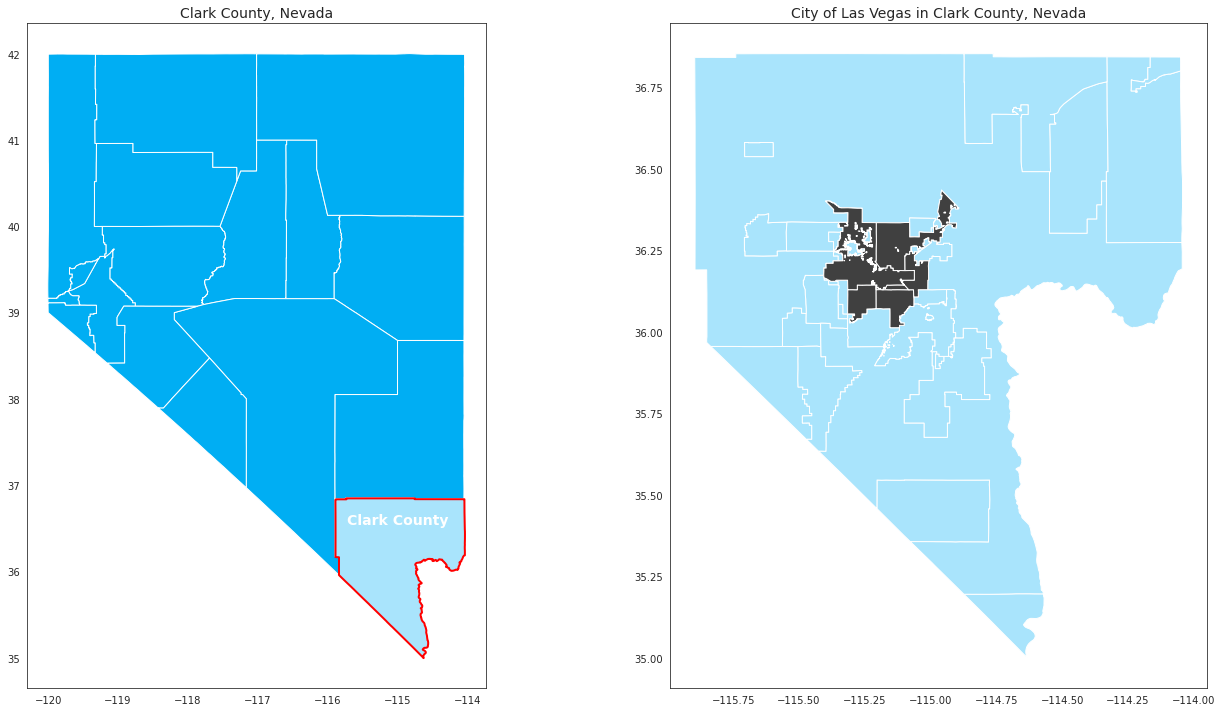

In [11]:
with sns.axes_style('white'):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

    nv_counties_df.plot(ax=ax1,color='#00AEF3')
    clark_county_df.plot(ax=ax1,color='#A9E4FC', edgecolor="red", linewidth=2.0, zorder=3)
    ax1.set_title("Clark County, Nevada", fontsize=14)

    x=-115.75 
    y=36.50 
    label="Clark County"
    ax1.annotate(label, xy=(x, y), xytext=(2, 4), textcoords="offset points", color="white", fontweight ="bold", fontsize=14)

    clark_place_df_proj.plot(ax=ax2, color='#A9E4FC')
    lv_area_df_select_proj.plot(ax=ax2, color='#404040')
    ax2.set_title("City of Las Vegas in Clark County, Nevada", fontsize=14)

    plt.tight_layout()
    plt.show()

### Visualising Parks and Trails in Clark County, Nevada

Lastly, let's visualise the landscape features found near to Las Vegas, such as recreational parks and trails.

**Note:** Download the Shapefile in ZIP format (185 records, ~237KB) from the [Clark County Parks dataset](https://clarkcountygis-ccgismo.hub.arcgis.com/datasets/ccgismo::clark-county-parks/explore?location=35.927054%2C-114.974050%2C9.86) from the Clark County GIS Management Office and upload it into the `Data1_NV_State` directory as `Clark_County_Recreation_Parks.zip`. The ZIP file was accessed on 6 June 2022.

The following cells will load with this file naming convention.

In [12]:
# Remember to download the Clark County Parks dataset before running cells 
clark_parks_df = gpd.read_file('Data1_NV_State/Clark_County_Recreation_Parks.zip')
print(clark_parks_df.shape)

(185, 14)


**Note:** Download the Shapefile in ZIP format (333 records, ~191KB) from the [Clark County Trails dataset](https://clarkcountygis-ccgismo.hub.arcgis.com/datasets/ccgismo::clark-county-trails/explore?location=35.927054%2C-114.974050%2C9.86) from the Clark County GIS Management Office and upload it into the `Data1_NV_State` directory as `Clark_County_Recreation_Trails.zip`. The ZIP file was accessed on 6 June 2022.

The following cells will load with this file naming convention.

In [13]:
# Remember to download the Clark County Trails dataset before running cells 
clark_trails_df = gpd.read_file('Data1_NV_State/Clark_County_Recreation_Trails.zip')
print(clark_trails_df.shape)

(333, 12)


In [14]:
clark_parks_df_proj = clark_parks_df.to_crs(clark_county_df.crs)
clark_trails_df_proj = clark_trails_df.to_crs(clark_county_df.crs)

The recreational parks (green) and trails (pink) are presented in the map visualisation below.

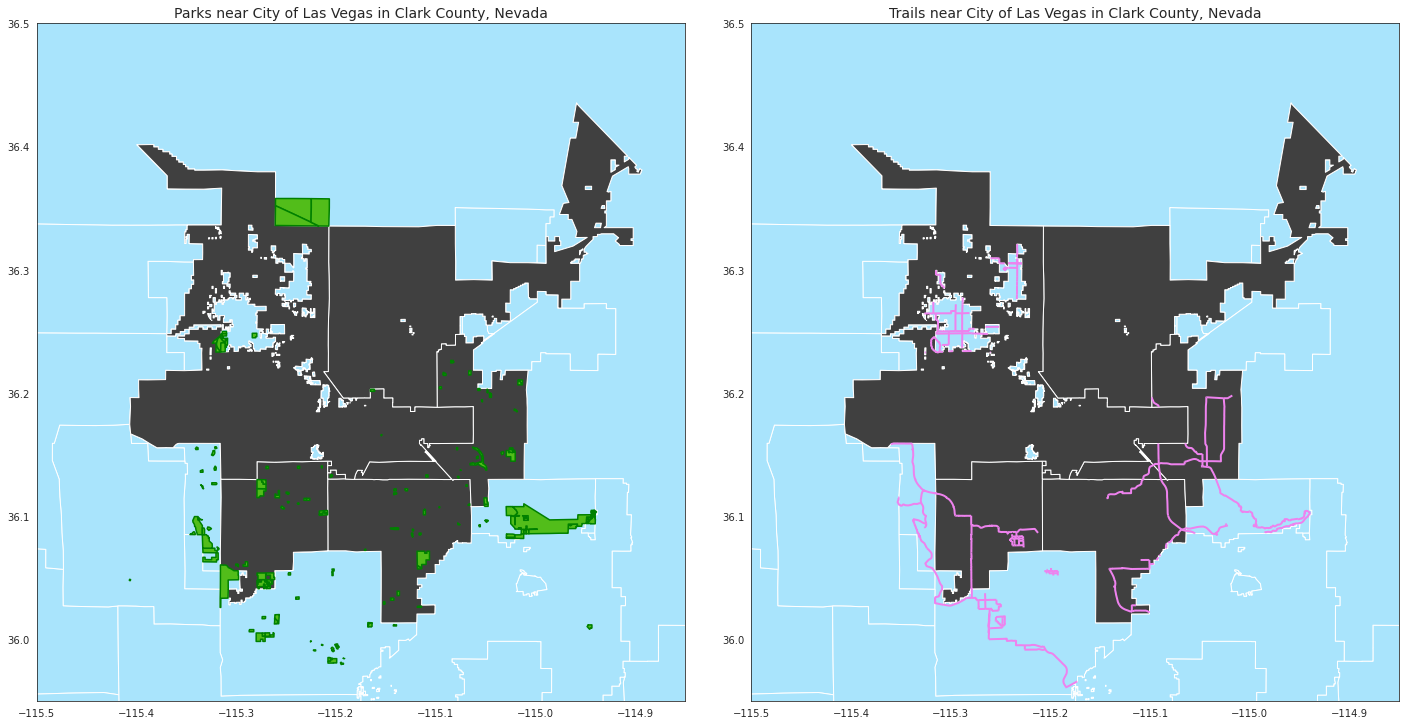

In [15]:
with sns.axes_style('white'):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

    clark_place_df_proj.plot(ax=ax1, color='#A9E4FC', zorder=1)
    lv_area_df_select_proj.plot(ax=ax1, color='#404040', zorder=2)
    clark_parks_df_proj.plot(ax=ax1, color='#52BD1A', edgecolor="green", linewidth=1.5, zorder=3) 
    ax1.set_title("Parks near City of Las Vegas in Clark County, Nevada", fontsize=14)

    ax1.set_xlim(-115.50, -114.85)
    ax1.set_ylim(35.95, 36.50)

    clark_place_df_proj.plot(ax=ax2, color='#A9E4FC', zorder=1)
    lv_area_df_select_proj.plot(ax=ax2, color='#404040', zorder=2)
    clark_trails_df_proj.plot(ax=ax2, color='#EE82EE', linewidth=2, zorder=3)
    ax2.set_title("Trails near City of Las Vegas in Clark County, Nevada", fontsize=14)

    ax2.set_xlim(-115.50, -114.85)
    ax2.set_ylim(35.95, 36.50)

    plt.tight_layout()
    plt.show()

We will now investigate the ASDI datasets to better understand the environmental characteristics of Las Vegas.

<a id='ASDI_dataset_1'></a>
<hr>

### Dataset 2: Air quality information from [OpenAQ](https://registry.opendata.aws/openaq/ "OpenAQ") 
---
**Note:** OpenAQ was accessed on 6 June 2022 from https://registry.opendata.aws/openaq. 

Data was retrieved using the [OpenAQ API](https://api.openaq.org/docs). Data can also be retrieved as a CSV file from the OpenAQ dataset using Amazon Athena. Instructions on this step are outlined in the [OpenAQ GitHub](https://gist.github.com/jflasher/573525aff9a5d8a966e5718272ceb25a). [Boto3](https://github.com/boto/boto3) can also be used to access the S3 bucket (without AWS credentials).

---

The PM2.5 data in the following visualisations is collected from _Reference-grade, Government, Stationary_ air quality sensors. The data type definitions can be found in the [OpenAQ GitHub](https://github.com/openaq/openaq-data-format/blob/master/data-type-definitions.md).

First, let's visualise the geographic locations of six air quality sensors within Las Vegas.

In [16]:
sensor_location = {'name':['Paul Meyer', 'RT', 'GreenValley', 'Jerome Mack', 'Sunrise Acres', 'Joe Neal'], 
                   'latitude': [36.106388, 36.139706, 36.048706, 36.141876, 36.163962, 36.270592],
                   'longitude': [-115.253334, -115.17565, -115.05294, -115.07874, -115.11393, -115.238282],
                   'openaq_loc': [1022, 7711, 1161, 1121, 344, 1124]
                  }

air_sensor_loc_df = pd.DataFrame(sensor_location)
print(air_sensor_loc_df.shape)

(6, 4)


In [17]:
geometry = [Point(xy) for xy in zip(air_sensor_loc_df['longitude'], air_sensor_loc_df['latitude'])]
air_sensor_gdf = gpd.GeoDataFrame(air_sensor_loc_df, geometry=geometry)
print(air_sensor_gdf.shape)

(6, 5)


In [18]:
air_sensor_gdf.set_crs(epsg='4269', inplace=True)
air_sensor_gdf_proj = air_sensor_gdf.to_crs(clark_county_df.crs)

You can see the location of the air quality sensors as red dots in the map visualisation below.

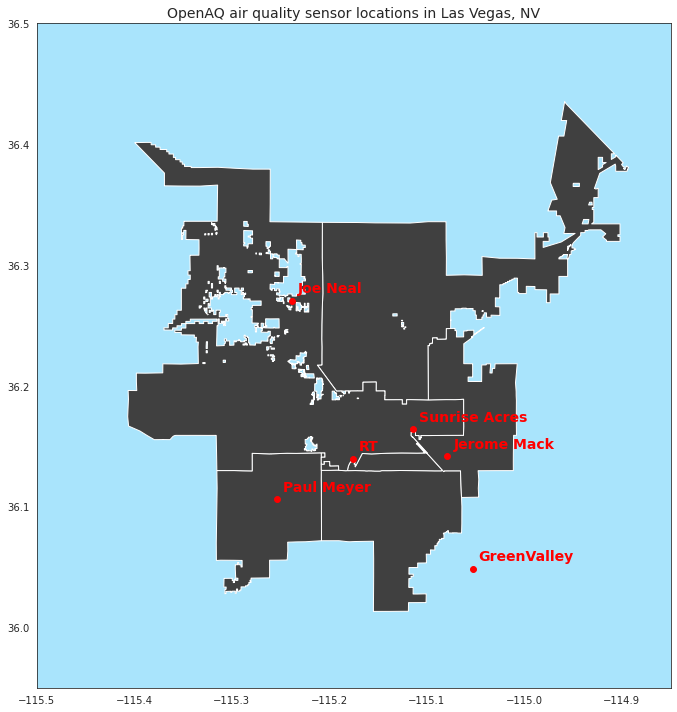

In [19]:
with sns.axes_style('white'):

    fig, ax = plt.subplots(figsize=(10,10))

    clark_county_df.plot(ax=ax,color='#A9E4FC')
    lv_area_df_select_proj.plot(ax=ax, color='#404040')
    air_sensor_gdf_proj.plot(ax=ax, marker='o', color='red', markersize=35)

    ax.set_xlim(-115.50, -114.85)
    ax.set_ylim(35.95, 36.50)

    for x, y, label in zip(air_sensor_loc_df.longitude, air_sensor_loc_df.latitude, air_sensor_loc_df.name):
        ax.annotate(label, xy=(x, y), xytext=(6, 8), textcoords="offset points", color="red", fontweight ="bold", fontsize=14)
    
    plt.title("OpenAQ air quality sensor locations in Las Vegas, NV", fontsize=14)
    plt.tight_layout()
    plt.show()

<br>

### What is PM2.5? _Why does it matter?_

Particulate matter (PM) is a common proxy indicator for air pollution. It affects more people than any other pollutant. 

The major components of PM are sulfate, nitrates, ammonia, sodium chloride, black carbon, mineral dust and water. It consists of a complex mixture of solid and liquid particles of organic and inorganic substances suspended in the air.

While particles with a diameter of 10 microns or less, (≤ PM10) can penetrate and lodge deep inside the lungs, the even more health-damaging particles are those with a diameter of 2.5 microns or less, (≤ PM2.5). PM2.5  can penetrate the lung barrier and enter the blood system. Chronic exposure to particles contributes to the risk of developing cardiovascular and respiratory diseases, as well as of lung cancer.


**Guideline values for fine particulate matter (PM2.5):**
- 5 μg/m3 annual mean
- 15 μg/m3 24-hour mean

There is a close, quantitative relationship between exposure to high concentrations of small particulates (PM10 and PM2.5) and increased mortality or morbidity, both daily and over time. Conversely, when concentrations of small and fine particulates are reduced, related mortality will also go down – presuming other factors remain the same. 

**Small particulate pollution has health impacts even at very low concentrations – indeed no threshold has been identified below which no damage to health is observed.**

**Source:** [World Health Organization - Ambient (outdoor) air pollution](https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health) accessed on 6 June 2022.

<br>

### Retrieving the air sensor PM2.5 data via OpenAQ API

Using the OpenAQ API, and referring to the [OpenAQ API documentation](https://api.openaq.org/docs), the average daily PM2.5 data for each sensor location is retrieved. 

The date range of the PM2.5 data is from midnight of 1st January 2018 to midnight of 31st May 2022.

In [20]:
# If error, check the OpenAQ API request URL
aq_requrl = "https://api.openaq.org/v2/averages"
df_api_combined = pd.DataFrame()

In [21]:
# parameter: 2 = PM2.5
for loc_no in sensor_location['openaq_loc']:
    print(loc_no)  
    
    aq_reqparams = {
    'date_from': '2018-01-01T00:00:00-07:00',
    'date_to': '2022-05-31T00:00:00-07:00',
    'parameter': [2],
    'limit': 2000,
    'page': 1,
    'offset': 0,
    'sort': 'asc',
    'spatial': 'location',
    'temporal': 'day',
    'location': [f'{loc_no}'],
    'group': 'true'
    }
    
    aq_resp = requests.get(aq_requrl, aq_reqparams)
    aq_resp_json = aq_resp.json()
    aq_resp_df = pd.DataFrame(aq_resp_json['results'])    
    df_api_combined = pd.concat([df_api_combined, aq_resp_df], ignore_index=True)
    
    print(df_api_combined.shape)

1022
(1567, 10)
7711
(3105, 10)
1161
(4672, 10)
1121
(6214, 10)
344
(7722, 10)
1124
(9222, 10)


In [22]:
df_api_combined['subtitle'] = df_api_combined['subtitle'].apply("".join)
df_api_combined['day'] = pd.to_datetime(df_api_combined['day'])
df_api_combined['year'] = df_api_combined['day'].dt.year
df_api_combined['month'] = df_api_combined['day'].dt.month
df_api_combined['date'] = df_api_combined['day'].dt.day
print(df_api_combined.shape)
df_api_combined.head()

(9222, 13)


,id,day,name,unit,average,subtitle,parameter,displayName,parameterId,measurement_count,year,month,date
0,[121415],2018-01-03,[1022],µg/m³,5.8000,Paul Meyer,pm25,PM2.5,2,3,2018,1,3
1,[121415],2018-01-04,[1022],µg/m³,5.4083,Paul Meyer,pm25,PM2.5,2,36,2018,1,4
2,[121415],2018-01-05,[1022],µg/m³,8.2857,Paul Meyer,pm25,PM2.5,2,42,2018,1,5
3,[121415],2018-01-06,[1022],µg/m³,8.8357,Paul Meyer,pm25,PM2.5,2,42,2018,1,6
4,[121415],2018-01-07,[1022],µg/m³,6.9833,Paul Meyer,pm25,PM2.5,2,18,2018,1,7


Let's investigate the distribution of the average daily PM2.5 concentration values at each sensor location, from 2018 to present day in 2022.

The data is presented, with the interquartile range for each location, in the violin plots below.

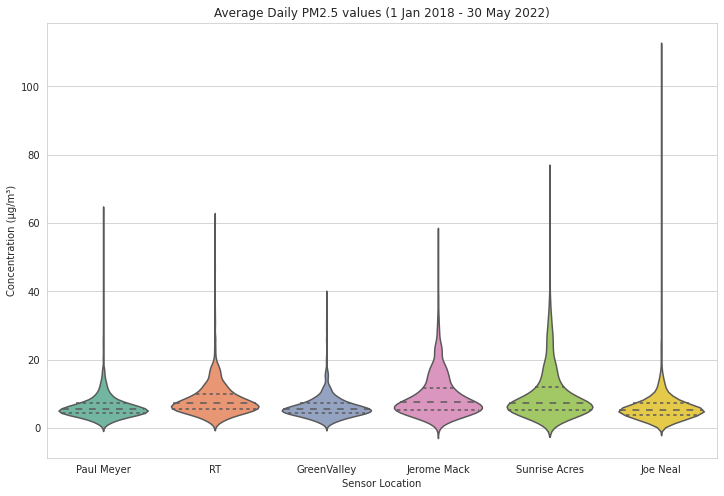

In [23]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(12,8))

    sns.violinplot(x='subtitle', 
                y='average', 
                data=df_api_combined, 
                scale='count', 
                inner='quartile',
                palette="Set2").set(
        xlabel='Sensor Location', 
        ylabel='Concentration (µg/m³)',
        title='Average Daily PM2.5 values (1 Jan 2018 - 30 May 2022)'
    )

    plt.show()

Since 1 January 2018, the upper quartile (75th percentile) of PM2.5 levels in every sensor location is less than 15µg/m³. However, there are infrequent spikes in detected PM2.5 levels in Las Vegas. Let's investigate these more closely.

The average daily PM2.5 levels are presented over time for each air quality sensor location in the visualisation below. The axes are the same dimensions for each sensor location for easier comparison.

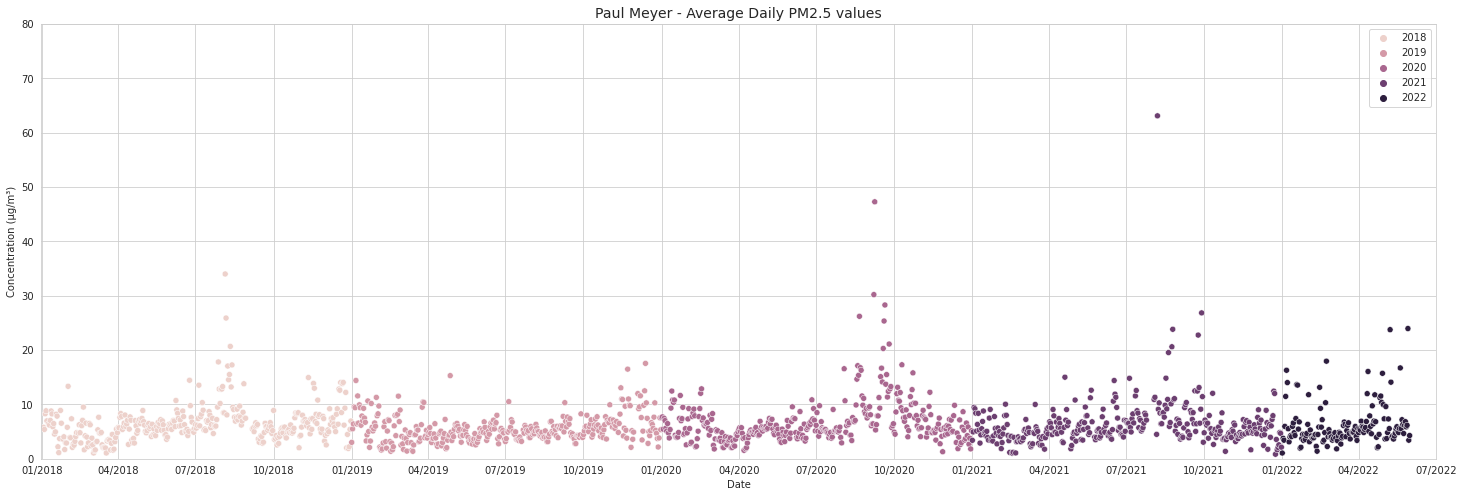

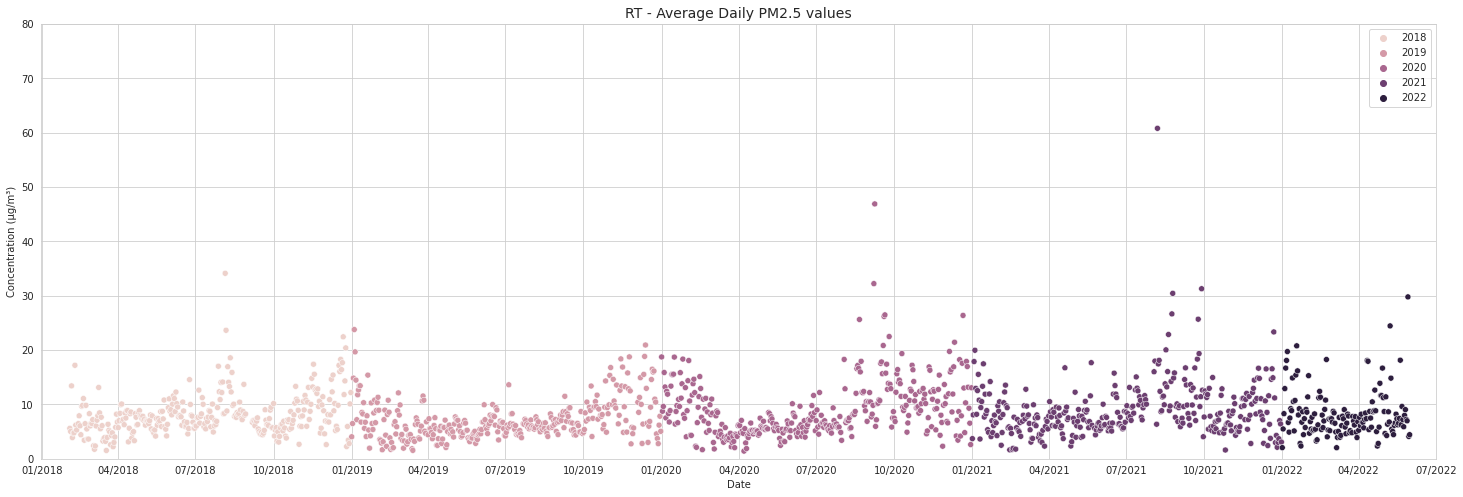

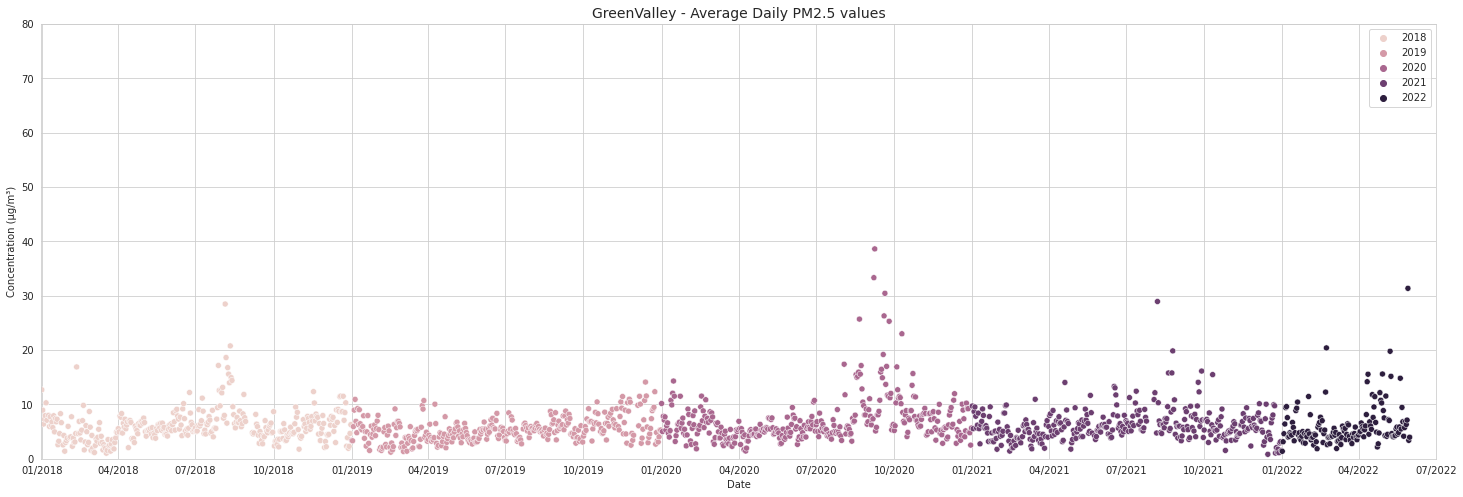

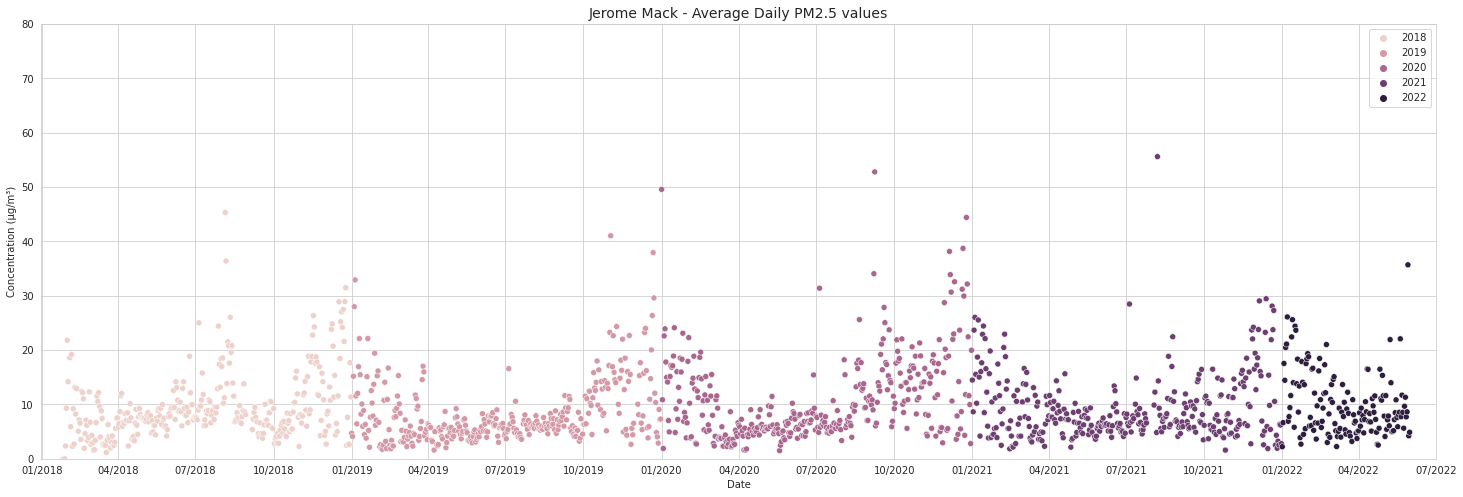

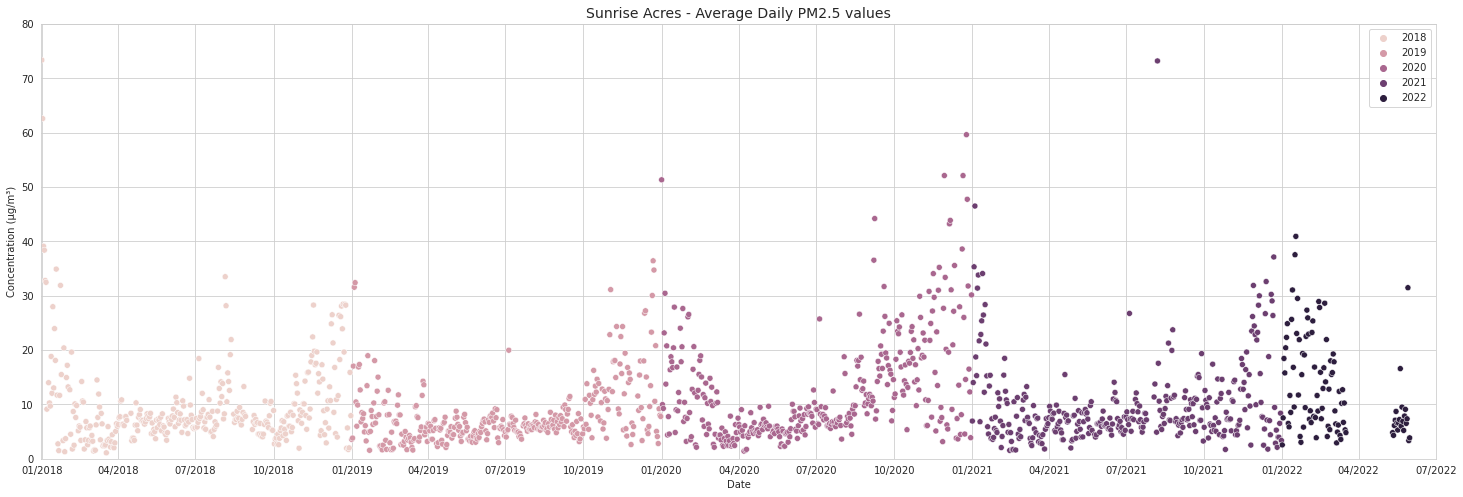

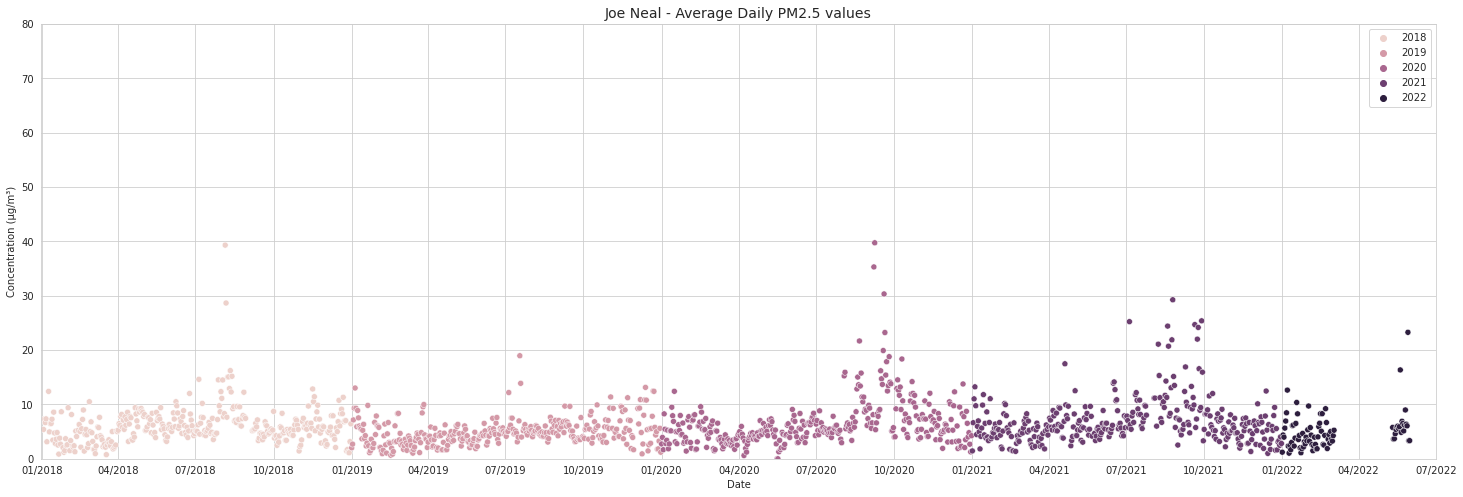

In [24]:
for location in df_api_combined['subtitle'].unique():
    
    with sns.axes_style('whitegrid'):

        plt.figure(figsize =(25,8))
        loc_df = df_api_combined[df_api_combined['subtitle']==f'{location}']
        ax = sns.scatterplot(x='day', y='average', data=loc_df, hue='year')

        plt.title(f'{location}'" - Average Daily PM2.5 values", fontsize=14)
        ax.set(xlabel='Date', ylabel='Concentration (µg/m³)')
        
        ax.set_xlim(pd.Timestamp('2017-12-31 00:00:00'), pd.Timestamp('2022-07-01 00:00:00'))

        date_form=DateFormatter("%m/%Y")
        ax.xaxis.set_major_formatter(date_form)
        ax.xaxis.set_major_locator(mdates.MonthLocator([1,4,7,10]))
        plt.ylim(0,80,10)
        
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles[0:], labels=labels[0:])

        plt.show()

### **Key Takeaway - OpenAQ dataset**

In all sensor locations, there is a seasonal increase in PM2.5 levels in Las Vegas between July and January. 

This coincides with the wildfire season in the Western United States and the smoke pollution caused by the uncontrolled burning. 

Notably, the devastating wildfires in 2020 led to tragic loss of life, evacuations and severe financial damages. 

<br>

<a id='ASDI_dataset_2'></a>
<hr>

### Dataset 3: Climate information from [NOAA U.S. Climate Normals](https://registry.opendata.aws/noaa-climate-normals/)
---
**Note:** NOAA U.S. Climate Normals was accessed on 6 June 2022 from https://registry.opendata.aws/noaa-climate-normals. 

This data was retrieved as a CSV file from the NOAA U.S. Climate Normals S3 bucket. 

Browse the S3 bucket [here](https://noaa-normals-pds.s3.amazonaws.com/index.html) or use `aws s3 ls --no-sign-request s3://noaa-normals-pds/`.

Additional documentation on the Daily Normals 2006-2020 data is available [here](https://noaa-normals-pds.s3.amazonaws.com/index.html#normals-daily/2006-2020/doc/) and additional information on the NWS Cooperative Network stations in Clark County is available [here](https://www.ncei.noaa.gov/access/homr/file/coop-stations.txt). Both were accessed on 6 June 2022.

---

<br>

### What is a "normal"? _Why does it matter?_

A "normal" is the 30-year average of a particular variable’s measurements, calculated for a uniform time period. Climate normals are derived from weather and climate observations captured by weather stations. Temperature daily normals are calculated using a procedure that ensures the daily normals for a month agree with the monthly normals when averaged. Climate Normals also include many statistics other than averages.

In addition to basic averages for temperature, precipitation, and snowfall, more than 500 separate types of weather and climate statistics are available as part of the U.S. Normals dataset. Some are well known metrics like heating and cooling degree days, growing season length for various temperature thresholds, numbers of days with precipitation or with temperatures below freezing, etc. Other statistics are less well known, but are needed by various user communities, including percentiles and probabilities of key variables. 

The U.S. Daily Climate Normals for 2006 to 2020 are 15-year averages of meteorological parameters that provide users supplemental normals for specialized applications for thousands of locations across the United States, as well as U.S. Territories and Commonwealths, and the Compact of Free Association nations.

**Source:** [NOAA National Centers for Environmental Information (NCEI) U.S. Climate Normals - About](https://www.ncei.noaa.gov/products/land-based-station/us-climate-normals) and [U.S. Climate Normals 2020: U.S. Daily Climate Normals (2006-2020)](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc%3AC01625/html) accessed on 6 June 2022.

<br>

### Retrieving the climate station data from the NOAA U.S. Climate Normals S3 bucket

In [25]:
# USC00264439 LAS VEGAS WFO 04 EXTREME SOUTHERN 36.0469, -115.1848
!aws --no-sign-request s3 cp s3://noaa-normals-pds/normals-daily/2006-2020/access/USC00264439.csv ./Data3_ASDI2_NOAA_US/

download: s3://noaa-normals-pds/normals-daily/2006-2020/access/USC00264439.csv to Data3_ASDI2_NOAA_US/USC00264439.csv


In [26]:
# USW00023169 MCCARRAN INTL AP 04 EXTREME SOUTHERN 36.0719, -115.16343
!aws --no-sign-request s3 cp s3://noaa-normals-pds/normals-daily/2006-2020/access/USW00023169.csv ./Data3_ASDI2_NOAA_US/

download: s3://noaa-normals-pds/normals-daily/2006-2020/access/USW00023169.csv to Data3_ASDI2_NOAA_US/USW00023169.csv


In [27]:
NOAA_lv_wfo_df = pd.read_csv('Data3_ASDI2_NOAA_US/USC00264439.csv')
NOAA_lv_mcrn_df = pd.read_csv('Data3_ASDI2_NOAA_US/USW00023169.csv')
print(NOAA_lv_wfo_df.shape)
print(NOAA_lv_mcrn_df.shape)

(366, 293)
(366, 293)


In [28]:
NOAA_sensor_loc = {'name': [NOAA_lv_wfo_df['NAME'][0], NOAA_lv_mcrn_df['NAME'][0]],
                   'latitude': [NOAA_lv_wfo_df['LATITUDE'][0], NOAA_lv_mcrn_df['LATITUDE'][0]],
                   'longitude': [NOAA_lv_wfo_df['LONGITUDE'][0], NOAA_lv_mcrn_df['LONGITUDE'][0]],
                  }

NOAA_sensor_loc_df = pd.DataFrame(NOAA_sensor_loc)
print(NOAA_sensor_loc_df.shape)
NOAA_sensor_loc_df.head()

(2, 3)


,name,latitude,longitude
0,"LAS VEGAS WFO, NV US",36.0469,-115.1847
1,"LAS VEGAS MCCARRAN AP, NV US",36.0719,-115.1633


In [29]:
geometry = [Point(xy) for xy in zip(NOAA_sensor_loc_df['longitude'], NOAA_sensor_loc_df['latitude'])]
NOAA_sensor_gdf = gpd.GeoDataFrame(NOAA_sensor_loc_df, geometry=geometry)
print(NOAA_sensor_gdf.shape)

(2, 4)


In [30]:
NOAA_sensor_gdf.set_crs(epsg='4269', inplace=True)
NOAA_sensor_gdf_proj = NOAA_sensor_gdf.to_crs(clark_county_df.crs)

The location of the NWS Cooperative Network stations, USC00264439 and USW00023169, are presented as yellow crosses on the map visualisation below.

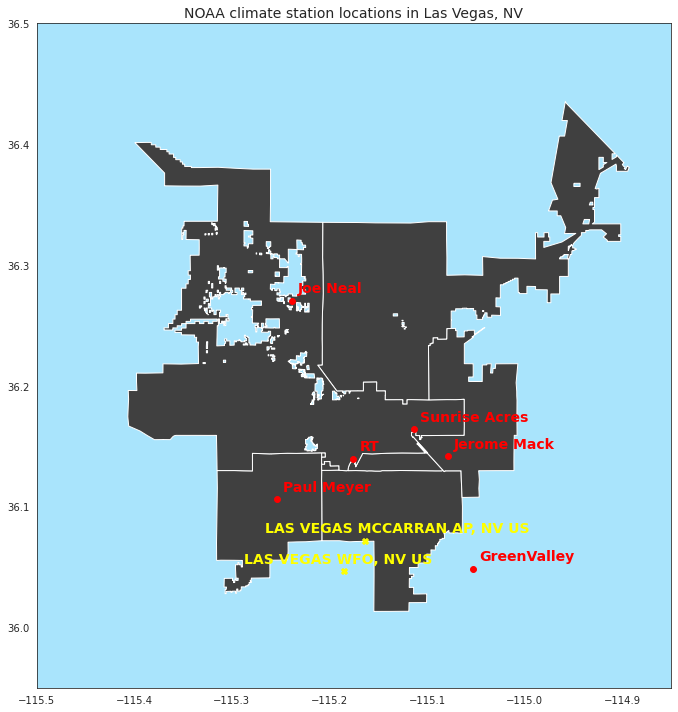

In [31]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(10,10))

    clark_county_df.plot(ax=ax,color='#A9E4FC')
    lv_area_df_select_proj.plot(ax=ax, color='#404040')
    air_sensor_gdf_proj.plot(ax=ax, marker='o', color='red', markersize=35)
    NOAA_sensor_gdf_proj.plot(ax=ax, marker='X', color='yellow', markersize=35)

    ax.set_xlim(-115.50, -114.85)
    ax.set_ylim(35.95, 36.50)

    for x, y, label in zip(air_sensor_loc_df.longitude, air_sensor_loc_df.latitude, air_sensor_loc_df.name):
        ax.annotate(label, xy=(x, y), xytext=(6, 8), textcoords="offset points", color="red", fontweight ="bold", fontsize=14)
        
    for x2, y2, label2 in zip(NOAA_sensor_loc_df.longitude, NOAA_sensor_loc_df.latitude, NOAA_sensor_loc_df.name):
        ax.annotate(label2, xy=(x2, y2), xytext=(-100, 8), textcoords="offset points", color="yellow", fontweight ="bold", fontsize=14)    

    plt.title("NOAA climate station locations in Las Vegas, NV", fontsize=14)
    plt.tight_layout()
    plt.show()

In [32]:
NOAA_combined_df = pd.concat([NOAA_lv_wfo_df, NOAA_lv_mcrn_df], ignore_index=True)
NOAA_combined_df.shape

(732, 293)

In [33]:
# Impute previous row value for -9999.0 values denoting missing / insufficient data point
ytd_prcp_zeros = list(NOAA_combined_df[NOAA_combined_df['YTD-PRCP-NORMAL']<0].index)
mtd_prcp_zeros = list(NOAA_combined_df[NOAA_combined_df['MTD-PRCP-NORMAL']<0].index)

for row in ytd_prcp_zeros:
    NOAA_combined_df.loc[row, 'YTD-PRCP-NORMAL'] = NOAA_combined_df['YTD-PRCP-NORMAL'].iloc[row-1]
    
for row in mtd_prcp_zeros:
    NOAA_combined_df.loc[row, 'MTD-PRCP-NORMAL'] = NOAA_combined_df['MTD-PRCP-NORMAL'].iloc[row-1]

In [34]:
# Drawing a heatmap
def weather_heatmap(data, color, **kws):
    values=data.columns.values[2]
    data = data.pivot(index='month', columns='day', values=values)
    sns.heatmap(data, cmap='coolwarm', **kws)  

# Joining heatmaps of every month in a year 
def weather_calendar(metric, df_input): 
    dfyear = df_input[['month', 'day', metric]]
    vmin=dfyear[metric].min()
    vmax=dfyear[metric].max()
    with sns.plotting_context(font_scale=12):
        g = sns.FacetGrid(dfyear, height=5, aspect=1)
        g = g.map_dataframe(weather_heatmap,vmin=vmin, vmax=vmax)
        g.set_axis_labels('Day', 'Month')
        g.add_legend(title='Temperature (°F)')
        plt.subplots_adjust(top=0.8)
        plt.title('2006-2020 U.S. Climate Normals - %s Calendar' %(metric), fontsize=14)

### Average Daily Temperature (°F)

From the temperature heatmaps displayed below, the average daily temperatures are high (>80°F) from mid May to September end. 

These hot conditions contribute to the risk of wildfires.

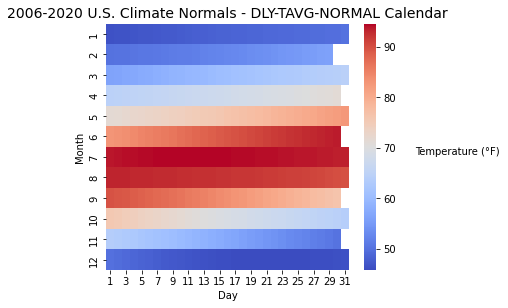

In [35]:
weather_calendar('DLY-TAVG-NORMAL', NOAA_lv_wfo_df)

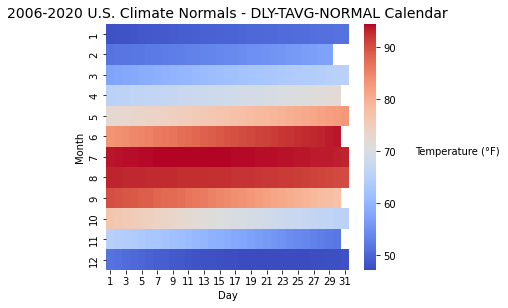

In [36]:
weather_calendar('DLY-TAVG-NORMAL', NOAA_lv_mcrn_df)

In [37]:
NOAA_combined_df['DATETIME'] = '2020-' + NOAA_combined_df['DATE']
NOAA_combined_df['DATESTAMP'] = pd.to_datetime(NOAA_combined_df['DATETIME'])

### Daily diurnal (day-night) temperaturature variation (°F)

There is a large (up to 28°F) variation in the day and night temperatures in Las Vegas. This is expected of desert environments since air temperatures drop significantly at night.

The variation in day and night temperatures is greater for the hot months between mid May and September. 

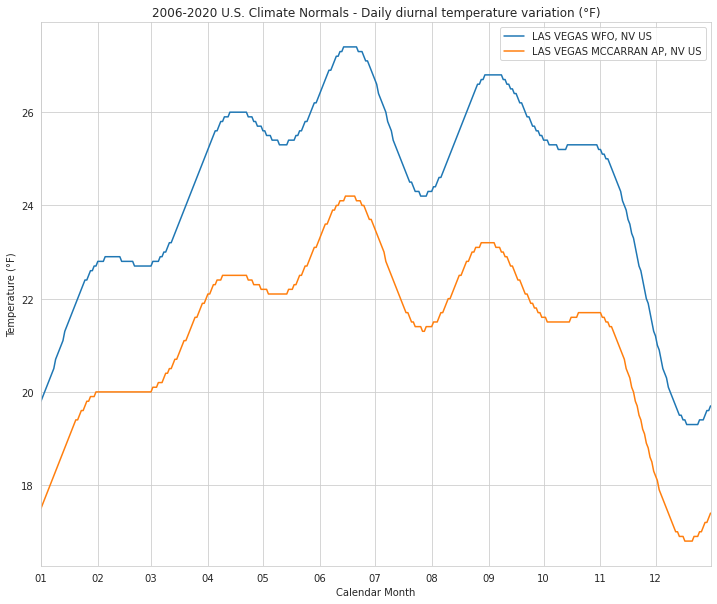

In [38]:
with sns.axes_style('whitegrid'): 
    fig = plt.figure(figsize = (12,10))

    ax = sns.lineplot(
                 x='DATESTAMP',
                 y='DLY-DUTR-NORMAL',
                 hue='NAME',
                 data=NOAA_combined_df,
                 markers='o',
                )
    ax.set(xlabel= 'Calendar Month', ylabel= 'Temperature (°F)', title='2006-2020 U.S. Climate Normals - Daily diurnal temperature variation (°F)')
    
    ax.set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-12-31'))

    date_form=DateFormatter("%m")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.MonthLocator(range(1,13,1)))
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[0:], labels=labels[0:])

### Year to Date Precipitation (inches rainfall)

The 2006-2020 U.S. Climate Normals show that Las Vegas receives **~4 inches of rainfall each year**. Between March and July, there is limited precipitation. 

These arid conditions further contribute to the risk of wildfires.

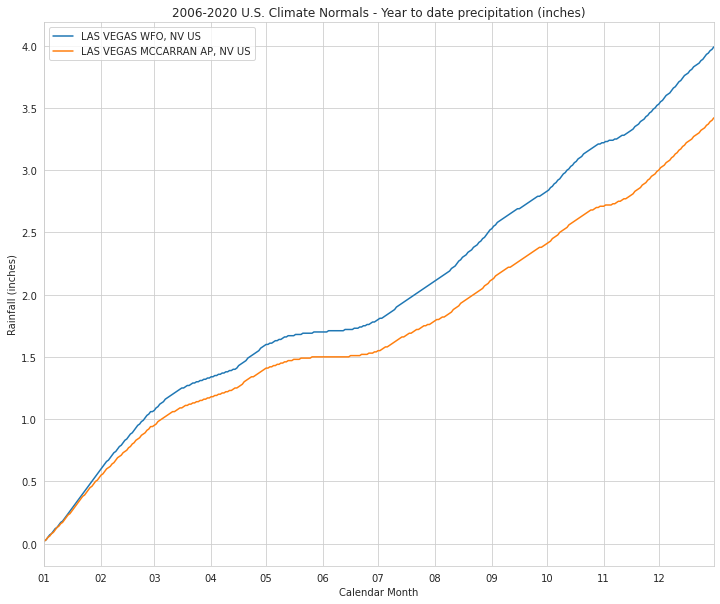

In [39]:
with sns.axes_style('whitegrid'): 
    fig = plt.figure(figsize = (12,10))

    ax = sns.lineplot(
             x='DATESTAMP',
             y='YTD-PRCP-NORMAL',
             hue='NAME',
             data=NOAA_combined_df,
             markers='o',
            )

    ax.set(xlabel= 'Calendar Month', ylabel= 'Rainfall (inches)', title='2006-2020 U.S. Climate Normals - Year to date precipitation (inches)')
    
    ax.set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-12-31'))

    date_form=DateFormatter("%m")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.MonthLocator(range(1,13,1)))
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[0:], labels=labels[0:])

### **Key Takeaway - NOAA U.S. Climate Normals dataset**

The hot and dry desert conditions of Las Vegas means the city's occupants are reliant upon the Colorado River for its water supply.

<br>

<a id='ASDI_dataset_3'></a>
<hr>

### Dataset 4: High Resolution Population Density Maps + Demographic Estimates by [CIESIN and Meta](https://registry.opendata.aws/dataforgood-fb-hrsl/)
---
**Note:** High Resolution Population Density Maps + Demographic Estimates by CIESIN and Meta was accessed on 6 June 2022 from https://registry.opendata.aws/dataforgood-fb-hrsl. Meta and Center for International Earth Science Information Network - CIESIN - Columbia University. 2022. High Resolution Settlement Layer (HRSL). Source imagery for HRSL © 2016 Maxar. Accessed 6 June 2022.


Data was retrieved as a CSV file  from the `datafordgood-fb-data/demographic_csvs/` S3 bucket. 

Browse the S3 bucket using `aws s3 ls --no-sign-request s3://dataforgood-fb-data/demographic_csvs/`.

---

In [40]:
# Population data for geographic area within latitude 30 - 39 and longitude -110 to -120
!aws --no-sign-request s3 cp s3://dataforgood-fb-data/demographic_csvs/population/population_lat_30_lon_-120.csv ./Data4_ASDI3_CIESIN_Meta/population_lat_30_lon_-120.csv

download: s3://dataforgood-fb-data/demographic_csvs/population/population_lat_30_lon_-120.csv to Data4_ASDI3_CIESIN_Meta/population_lat_30_lon_-120.csv


In [41]:
df_pop = pd.read_csv('Data4_ASDI3_CIESIN_Meta/population_lat_30_lon_-120.csv')
print(df_pop.shape)

(14161680, 3)


In [42]:
# Filter the population data to Las Vegas areas for plotting
df_pop_scaled = df_pop[(35.95 < df_pop['latitude']) & (df_pop['latitude'] < 36.50) & (-115.50 < df_pop['longitude']) & (df_pop['longitude'] < -114.85)]
print(df_pop_scaled.shape)

(706110, 3)


In [43]:
geometry = [Point(xy) for xy in zip(df_pop_scaled['longitude'], df_pop_scaled['latitude'])]
pop_scaled_gdf = gpd.GeoDataFrame(df_pop_scaled, geometry=geometry)
print(pop_scaled_gdf.shape)
pop_scaled_gdf.head()

(706110, 4)


,latitude,longitude,population,geometry
236,36.058750,-115.000139,12.072015,POINT (-115.00014 36.05875)
237,36.059028,-114.999306,12.072015,POINT (-114.99931 36.05903)
238,36.059583,-114.999861,12.072015,POINT (-114.99986 36.05958)
239,36.059861,-115.000972,12.072015,POINT (-115.00097 36.05986)
240,36.060139,-115.000417,12.072015,POINT (-115.00042 36.06014)


In [44]:
pop_scaled_gdf.set_crs(epsg='4269', inplace=True)
pop_scaled_gdf_proj = pop_scaled_gdf.to_crs(clark_county_df.crs)

From the CIESIN and Meta dataset, the approximate population of the Las Vegas area is ~2.56 million people.

In [45]:
pop_scaled_gdf['population'].sum()

2563805.2415553983

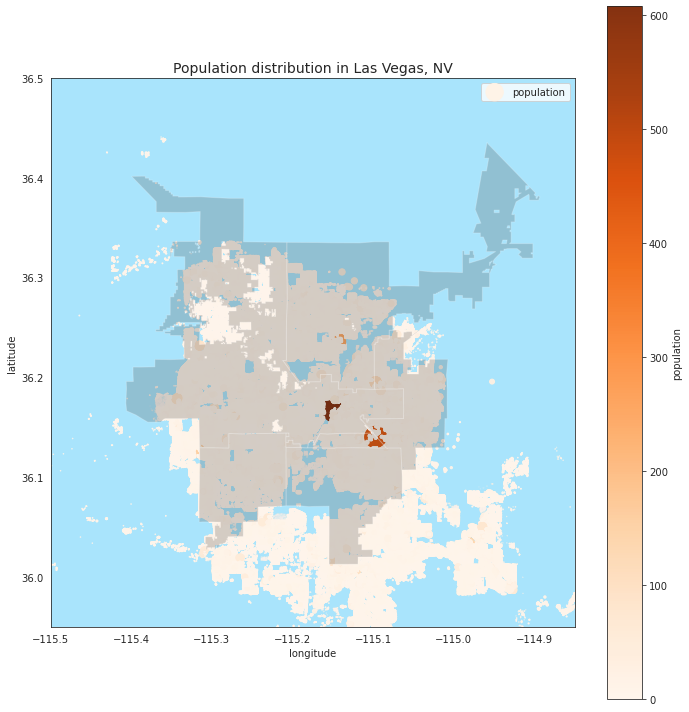

In [46]:
with sns.axes_style('white'): 
    fig, ax = plt.subplots(figsize=(10,10))

    clark_county_df.plot(ax=ax,color='#A9E4FC', zorder=1)
    lv_area_df_select_proj.plot(ax=ax, color='#404040', zorder=3, alpha=0.22)

    pop_scaled_gdf_proj.plot(ax=ax, kind="scatter", x="longitude", y="latitude",
        s=pop_scaled_gdf_proj['population'], label="population",
        c="population", cmap=plt.get_cmap("Oranges"),
        colorbar=True, alpha=0.95, zorder=2
    )

    ax.set_xlim(-115.50, -114.85)
    ax.set_ylim(35.95, 36.50)

    plt.title("Population distribution in Las Vegas, NV", fontsize=14)
    plt.tight_layout()
    plt.show()

### **Key Takeaway - CIESIN and Meta dataset**

From the CIESIN and Meta dataset, the population (red shade) of Las Vegas is spread across the built urban area, including further South in Enterprise, an unincorporated town, and the City of Henderson.

The visualisation shows a more densely populated region (dark red) in the Downtown area of Las Vegas.

<br>

<a id='ASDI_dataset_4'></a>
<hr>

### Dataset 5: Building information from [Open City Model](https://registry.opendata.aws/opencitymodel/)
---
**Note:** Open City Model (OCM) was accessed on 6 June 2022 from https://registry.opendata.aws/opencitymodel. 

This data was retrieved as a CSV file from the Open City Model dataset using Amazon Athena. Instructions on this step are outlined in the [Open City Model GitHub](https://github.com/opencitymodel/opencitymodel/blob/master/examples/Query-OpenCityModel-using-AWS-Athena.md).

---

The [Open City Model GitHub](https://github.com/opencitymodel/opencitymodel/) uses "Clark" (32003) to represent Clark County, Nevada and includes the cities surrounding the Las Vegas strip. The city data for Nevada state in JSON format are hosted [here](https://htmlpreview.github.io/?https://github.com/opencitymodel/opencitymodel/blob/master/releases/2019-jun/Nevada.html).

### Load Open City Model dataset - Option 1 (Amazon Athena)

**Note:** The Open City Model data for Nevada state can be retrieved using Amazon Athena, as per the instructions in the [Open City Model GitHub](https://github.com/opencitymodel/opencitymodel/blob/master/examples/Query-OpenCityModel-using-AWS-Athena.md).

Use the following SQL query within the Amazon Athena query editor and download the query results as a CSV file. 

`SELECT *
FROM <database_name>.jun2019
WHERE state = 'Nevada';`

Upload the CSV file into the `Data5_ASDI4_OpenCityModel` directory as `OpenCityModel_Nevada.csv`.

The following cells will load with this file naming convention.

In [47]:
# Uncomment the following code if using the CSV file 
# df_ocm_nv = pd.read_csv('Data5_ASDI4_OpenCityModel/OpenCityModel_Nevada.csv')
# print(df_ocm_nv.shape)

In [48]:
# Uncomment the following code if using the CSV file 
# Filter the population data to Las Vegas areas for plotting
# df_ocm_nv_scaled = df_ocm_nv[(35.95 < df_ocm_nv['lat']) & (df_ocm_nv['lat'] < 36.50) & (-115.50 < df_ocm_nv['lon']) & (df_ocm_nv['lon'] < -114.85)]
# print(df_ocm_nv_scaled.shape)

In [49]:
# Uncomment the following code if using the CSV file  
# geometry = [Point(xy) for xy in zip(df_ocm_nv_scaled['lon'], df_ocm_nv_scaled['lat'])]
# df_ocm_nv_gdf = gpd.GeoDataFrame(df_ocm_nv_scaled, geometry=geometry)
# print(df_ocm_nv_gdf.shape)
# df_ocm_nv_gdf.head()

In [50]:
# Uncomment the following code if using the CSV file  
# df_ocm_nv_gdf.rename(columns={'lon':"Longitude", 'lat':"Latitude", 'height':"Height"}, 
#                    inplace=True)
# df_ocm_nv_gdf.head()

Proceed to **"Visualising the Open City Model dataset"** section to display this DataFrame. 

### Load Open City Model dataset - Option 2 (S3 bucket)

**Note:** The Open City Model data for Nevada state can be retrieved as CityJSON files from the `s3://opencitymodel/2019-jun/json/Nevada/32003/` S3 bucket.

Browse the S3 bucket using aws s3 ls --no-sign-request `s3://opencitymodel/2019-jun/json/Nevada/32003/`.

Recursively download all the CityJSON files into the `Data5_ASDI4_OpenCityModel` directory.

The following cells will load with this file naming convention.

In [51]:
!aws --no-sign-request s3 cp s3://opencitymodel/2019-jun/json/Nevada/32003/ ./Data5_ASDI4_OpenCityModel --recursive

download: s3://opencitymodel/2019-jun/json/Nevada/32003/Nevada-32003-000.json to Data5_ASDI4_OpenCityModel/Nevada-32003-000.json
download: s3://opencitymodel/2019-jun/json/Nevada/32003/Nevada-32003-001.json to Data5_ASDI4_OpenCityModel/Nevada-32003-001.json
download: s3://opencitymodel/2019-jun/json/Nevada/32003/Nevada-32003-003.json to Data5_ASDI4_OpenCityModel/Nevada-32003-003.json
download: s3://opencitymodel/2019-jun/json/Nevada/32003/Nevada-32003-002.json to Data5_ASDI4_OpenCityModel/Nevada-32003-002.json
download: s3://opencitymodel/2019-jun/json/Nevada/32003/Nevada-32003-004.json to Data5_ASDI4_OpenCityModel/Nevada-32003-004.json
download: s3://opencitymodel/2019-jun/json/Nevada/32003/Nevada-32003-007.json to Data5_ASDI4_OpenCityModel/Nevada-32003-007.json
download: s3://opencitymodel/2019-jun/json/Nevada/32003/Nevada-32003-010.json to Data5_ASDI4_OpenCityModel/Nevada-32003-010.json
download: s3://opencitymodel/2019-jun/json/Nevada/32003/Nevada-32003-011.json to Data5_ASDI4_Open

In [52]:
ocm_json_df = pd.DataFrame()

for file_no in range(0,16,1):
    print('Loading JSON file number %s into DataFrame' %'{0:03}'.format(file_no))
    
    with open('Data5_ASDI4_OpenCityModel/Nevada-32003-%s.json' %'{0:03}'.format(file_no)) as json_data:
        obj = json.load(json_data)
        vert_df = pd.DataFrame(obj['vertices'])
        ocm_json_df = pd.concat([ocm_json_df, vert_df], ignore_index=True)

Loading JSON file number 000 into DataFrame
Loading JSON file number 001 into DataFrame
Loading JSON file number 002 into DataFrame
Loading JSON file number 003 into DataFrame
Loading JSON file number 004 into DataFrame
Loading JSON file number 005 into DataFrame
Loading JSON file number 006 into DataFrame
Loading JSON file number 007 into DataFrame
Loading JSON file number 008 into DataFrame
Loading JSON file number 009 into DataFrame
Loading JSON file number 010 into DataFrame
Loading JSON file number 011 into DataFrame
Loading JSON file number 012 into DataFrame
Loading JSON file number 013 into DataFrame
Loading JSON file number 014 into DataFrame
Loading JSON file number 015 into DataFrame


In [53]:
ocm_json_df.rename(columns={0:"Longitude", 1:"Latitude", 2:"Height"}, 
                   inplace=True)

In [54]:
print(ocm_json_df.shape)
ocm_json_df.head()

(7165057, 3)


,Longitude,Latitude,Height
0,-115.159455,36.007565,0.00
1,-115.159457,36.007389,0.00
2,-115.159709,36.007391,0.00
3,-115.159707,36.007567,0.00
4,-115.159455,36.007565,15.15


In [55]:
# DROP all the 0 height, this represents the areas IN BETWEEN the buildings!
ocm_json_df = ocm_json_df[ocm_json_df['Height']>0]
print(ocm_json_df.shape)

(3602889, 3)


In [56]:
# Filter the Open City Model data to Las Vegas areas for plotting
df_ocm_nv_scaled = ocm_json_df[(35.95 < ocm_json_df['Latitude']) & (ocm_json_df['Latitude'] < 36.50) & (-115.50 < ocm_json_df['Longitude']) & (ocm_json_df['Longitude'] < -114.85)]
print(df_ocm_nv_scaled.shape)

(3400997, 3)


In [57]:
geometry = [Point(xy) for xy in zip(df_ocm_nv_scaled['Longitude'], df_ocm_nv_scaled['Latitude'])]
df_ocm_nv_gdf = gpd.GeoDataFrame(df_ocm_nv_scaled, geometry=geometry)
print(df_ocm_nv_gdf.shape)
df_ocm_nv_gdf.head()

(3400997, 4)


,Longitude,Latitude,Height,geometry
4,-115.159455,36.007565,15.15,POINT (-115.15945 36.00756)
5,-115.159457,36.007389,15.15,POINT (-115.15946 36.00739)
6,-115.159709,36.007391,15.15,POINT (-115.15971 36.00739)
7,-115.159707,36.007567,15.15,POINT (-115.15971 36.00757)
12,-115.159130,36.005183,18.94,POINT (-115.15913 36.00518)


This DataFrame contains the vertices of the building areas in the Las Vegas area. 

### Visualising the Open City Model dataset

In [58]:
df_ocm_nv_gdf.set_crs(epsg='4269', inplace=True)
df_ocm_nv_gdf_proj = df_ocm_nv_gdf.to_crs(clark_county_df.crs)

Let's explore the distribution of building heights in Las Vegas, in the box plot visualisation below.

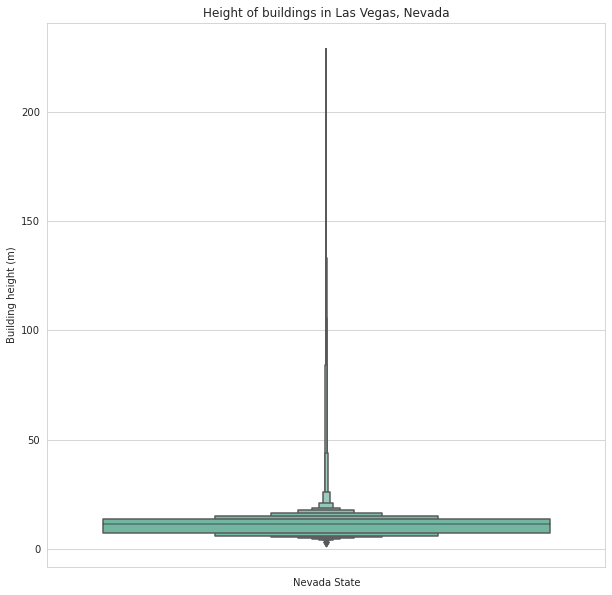

In [59]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(10,10))

    sns.boxenplot(
                y='Height', 
                data=df_ocm_nv_gdf_proj, 
                palette="Set2").set(
        xlabel='Nevada State', 
        ylabel='Building height (m)',
        title='Height of buildings in Las Vegas, Nevada'
    )

    plt.show()

The upper quartile (75th percentile) of buildings in Las Vegas are below 30 meters. This is expected of the large number of residential buildings housing the ~2.6 million Las Vegas residents.

The taller buildings (>150m) are hotels such as the Fontainebleau Las Vegas, Resorts World Las Vegas, The Palazzo and Encore. 

However, the Open City Model dataset does not include the Strat tower (1,149 feet or 350 meters tall).

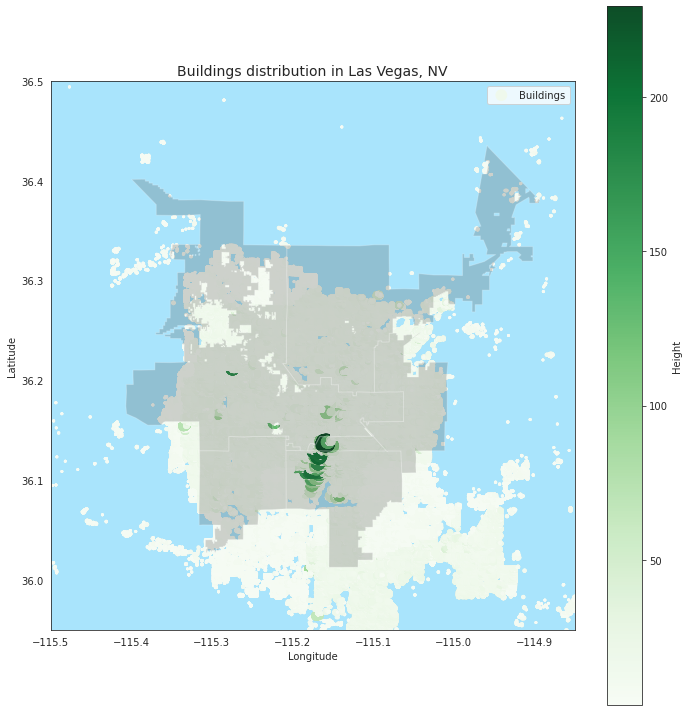

In [60]:
with sns.axes_style('white'): 
    fig, ax = plt.subplots(figsize=(10,10))

    clark_county_df.plot(ax=ax,color='#A9E4FC', zorder=1)
    lv_area_df_select_proj.plot(ax=ax, color='#404040', zorder=3, alpha=0.22)

    df_ocm_nv_gdf_proj.plot(ax=ax, kind="scatter", x="Longitude", y="Latitude",
        s=df_ocm_nv_gdf_proj['Height'], label="Buildings", 
        c="Height", cmap=plt.get_cmap("Greens"),
        colorbar=True, alpha=0.95, zorder=2
    )

    ax.set_xlim(-115.50, -114.85)
    ax.set_ylim(35.95, 36.50)

    plt.title("Buildings distribution in Las Vegas, NV", fontsize=14)
    plt.tight_layout()
    plt.show()

### **Key Takeaway - Open City Model dataset**

The Open City Model data shows the taller (>100m high) hotel buildings (dark green) are concentrated along the Las Vegas Strip. 

<br>

<hr>

## **Conclusion**

This demo project briefly explored the [air quality data from OpenAQ](#ASDI_dataset_1), [temperature and precipitation data from the NOAA US Climate Normals](#ASDI_dataset_2), [population data from CIESIN and Meta](#ASDI_dataset_3) and [built environment information from Open City Model](#ASDI_dataset_4) for Las Vegas.

As more datasets are added to the [Amazon Sustainability Data Initiative](https://registry.opendata.aws/collab/asdi/), this demo project can be extended to develop deeper insights.

It would be interesting to explore electric and fossil fuel energy consumption, vehicle traffic flows and socio-economic data, such as income per capita or car ownership per capita, across Las Vegas and combine that with the information we already know.

Lastly, we've only investigated Las Vegas, Nevada in this demo project. Please feel free to investigate and compare against other US cities!